In [1]:
import pandas as pd

data = pd.read_csv("troll.csv")

In [2]:
data.head()

,Unnamed: 0,class,tweet
0,0,1,Get fucking real dude.
1,1,1,She is as dirty as they come and that crook ...
2,2,1,why did you fuck it up. I could do it all day...
3,3,1,Dude they dont finish enclosing the fucking s...
4,4,1,WTF are you talking about Men? No men thats n...


In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   20001 non-null  int64 
 1   tweet   20001 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from tqdm import tqdm

def clean_text(raw_text):
    # Remove unnecessary symbols and numbers
    cleaned_text = re.sub('[^a-zA-Z]', ' ', raw_text)
    
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    
    # Tokenize the text
    words = cleaned_text.split()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Perform stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [8]:
tqdm.pandas()
data['cleaned_text'] = data['tweet'].apply(clean_text)

In [9]:
data['cleaned_text']

0                                       get fuck real dude
1        dirti come crook rengel dem fuck corrupt joke ...
2        fuck could day let hour ping later sched write...
3        dude dont finish enclos fuck shower hate half ...
4                          wtf talk men men that menag gay
                               ...                        
19996                                     dont complain go
19997    bahah yeah total gonna get piss talk mhm that ...
19998             hahahahaha im evil mwahahahahahahahahaha
19999                                    someth uniqu ohio
20000                                  biggest gossip know
Name: cleaned_text, Length: 20001, dtype: object

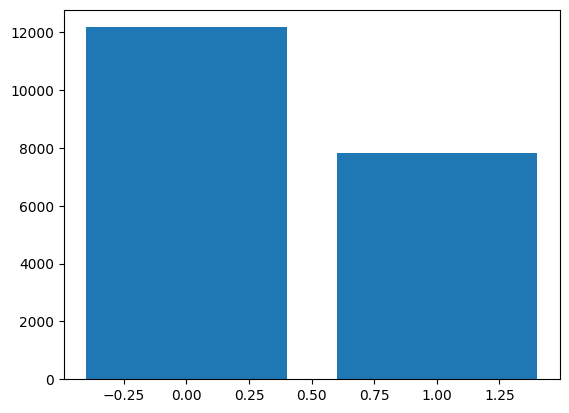

In [11]:
import matplotlib.pyplot as plt

balance_count = data['class'].value_counts()

plt.bar(x=balance_count.index, height=balance_count.values)
plt.show()

In [33]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

# Set random seed for reproducibility
tf.random.set_seed(42)

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

d:\LLM\venv\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\naman\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
# Define your training data
train_texts = list(data['tweet'].values)
train_labels = list(data['class'].values)  # Corresponding labels (1 or 0) for the texts

In [35]:
# Tokenize the input texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True)

In [36]:
# Create TensorFlow datasets for training
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).shuffle(len(train_texts)).batch(8)

In [38]:
# Define optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

In [39]:
# Compile the model
c

# Fine-tune the model
model.fit(train_dataset, epochs=3)

Epoch 1/3


ResourceExhaustedError:  failed to allocate memory
	 [[node Adam/Adam/update/mul_4 (defined at d:\LLM\venv\lib\site-packages\transformers\modeling_tf_utils.py:1604) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_45801]

Function call stack:
train_function


In [32]:
train_encodings

{'input_ids': array([[ 3919,   545,   655, ..., 50256, 50256, 50256],
       [10814,   220,   645, ..., 50256, 50256, 50256],
       [13775, 32744, 13896, ..., 50256, 50256, 50256],
       ...,
       [29214, 25320,   284, ..., 50256, 50256, 50256],
       [43669,  4818, 21551, ..., 50256, 50256, 50256],
       [ 1312,   766,   345, ..., 50256, 50256, 50256]]), 'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])}